# The electric consumption of houses

Leveraging the dataset located here:
https://www.eia.gov/consumption/residential/data/2009/index.php?view=microdata, I built a model that predicts the electric
consumption of housings. The electric
consumption is located in the KWH field.

The notebook consists of 3 parts:

1. Data Engineering
2. Machine Learning Solution
3. Analysing the results

### Packages:
Import packages that are used throughout the code:

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Data Engineering

The important parts and steps are:

1. loading the data.
2. seeing what's inside
3. preprocess the data: 
    3.1. treat NaN values
    3.2. treat non-numeric values
4. prepare the preprocessed data for the machine learning task:
    4.1. selecting the features(independent variables) and the target (dependent variable)
    4.2. splitting the data for train-validation and test sets.


### Step 1.1. Loading the data:

In [2]:

data = pd.read_csv("/Users/roghaiyeh/Desktop/Work/zesty.ai/recs2009_public.csv")

/Users/roghaiyeh/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Step 1.2. seeing what's inside:

In [3]:
data.head(10)

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90
5,6,2,4,10,2,4232.49,8866,270,8708,436,...,-2,6A-6B,5219,3,8420,0.58,0,49,-9,84
6,7,1,2,3,2,7862.34,5213,749,5355,796,...,-2,4A,2133,25,4550,0.51,4,53,14,86
7,8,3,5,17,2,6297.04,1086,2647,1070,2554,...,-2,1A-2A,129,69,148,0.35,21,70,43,95
8,9,1,2,5,3,12156.72,4826,1027,5381,912,...,-2,4A,2367,35,4670,0.47,5,55,16,90
9,10,2,4,12,2,3242.22,4687,1205,4755,1467,...,-2,4A,2024,67,4345,0.47,6,58,10,89


In [4]:
data.shape

(12083, 940)

### Step 1.3. preprocess the data
Preprocessing the data is an important step before starting any machine learning task because if the data is not clean or it's not understandable for the machine learning model, its not possible to design an accurate machine learning model.
My first step to preprocess the data is to look for the NaN values and treat them.
Then, I'll look for the categorical features.

### Step 1.3.1. treat NaN values:
First check for NaN values.

In [5]:
# check for NaN values
df = data.copy()
NANs_number = df.isna().sum(axis = 0)
NANs_number.max()
# a solution if there was NaN values
# for c in df.head(): 
#     df[c] = df[c].fillna(value=df[c].mean())

0

There is no NaN values and data is clean from this point of view

### Step 1.3.2. treat non-numeric values (categorical features):
When I looked at the data above, I realized that there are some values in data that are not numeric (like column "IECC_Climate_Pub"). So I find them and then look at them to find the best way to encode them to numeric values because machine learning systems can only handle numeric values in the features.

In [6]:
# find non-numeric columns
heads = data.head()
str_cols = []
for i in heads:
    if is_string_dtype(data[i]):
        str_cols.append(i)
str_cols

['METROMICRO', 'UR', 'NOCRCASH', 'NKRGALNC', 'IECC_Climate_Pub']

In [7]:
# see values in non-numeric columns
uniquesMETROMICRO = df["METROMICRO"].unique()
uniquesUR = df["UR"].unique()
uniquesNOCRCASH = df["NOCRCASH"].unique()
uniquesNKRGALNC = df["NKRGALNC"].unique()
uniquesIECC_Climate_Pub = df["IECC_Climate_Pub"].unique()

print("METROMICRO",uniquesMETROMICRO)
print("UR",uniquesUR)
print("NOCRCASH",uniquesNOCRCASH)
print("NKRGALNC",uniquesNKRGALNC)
print("IECC_Climate_Pub",uniquesIECC_Climate_Pub)


METROMICRO ['METRO' 'MICRO' 'NONE']
UR ['U' 'R']
NOCRCASH [-2 1 6 15 4 '-2' '1' '20' '.' '12' '4' '10' '3' '24' '55' '6' 8 28 5 55 3
 16 2 20 10 24 40 12 25]
NKRGALNC [-2 1 5 10 '-2' '10' '15' '1' '8' '.' '5' '3' '2' '77' 30 3 15 8 55 2 20]
IECC_Climate_Pub ['4A' '3C' '5A' '6A-6B' '1A-2A' '3B-4B' '3A' '5B-5C' '7A-7B-7AK-8AK' '2B'
 '4C']


In [8]:
# write a function to encode string values to numbers
def encode(df, uniques, colname):
    """
    @param df pandas DataFrame
    @param colname colname to encode 
    @return a DataFrame with encoding
    """
    k = 0
    d = df[colname]
    for j in uniques:
        d[d == j] = k
        k +=1
    df[colname] = d
    return df

In [9]:

# convert non-numeric columns to numeric ones
df = encode(df, uniquesMETROMICRO, "METROMICRO")
df = encode(df, uniquesUR, "UR")
df = encode(df, uniquesIECC_Climate_Pub, "IECC_Climate_Pub")
df[df.eq('.').any(1)] = 0 # some zeros were entered as '.' in the database
# df[df == '.'] = 0
df['NOCRCASH'] = pd.to_numeric(df['NOCRCASH'])
df['NKRGALNC'] = pd.to_numeric(df['NKRGALNC'])

/Users/roghaiyeh/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/roghaiyeh/opt/anaconda3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


### Step 4. Prepare the preprocessed data for the machine learning task:
First I select all the features(independent variables) and put them in matrix X. I put the target (dependent variable) which is the consumption in Y .
Then I split the data for train-validation and test sets.

In [10]:
# separete features and targets
Y = df.loc[:, df.columns == 'KWH']
X = df.loc[:, df.columns != 'KWH']


In [11]:
# separete train-validation and test data
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1, random_state=0)


## Part 2: Machine Learning Solution

Now that the data is ready, I use it to train a machine learning model. Since the target is a continous value, this is a regression task. So, I first start with the most straightforward (and simplest) algorithm, linear regression.
I use 10-fold cross validation to make sure of a good level of bias-variance trade-off.


In [12]:
# LinearRegression model using k-fold cross validation 
kfold = model_selection.KFold(n_splits=10, random_state=7)
model = LinearRegression()
resultsMAE = cross_val_score(model, train_x, train_y, cv=kfold, n_jobs=-1, scoring='neg_mean_absolute_error')
resultsMSE = cross_val_score(model, train_x, train_y, cv=kfold, n_jobs=-1, scoring='neg_mean_squared_error')
resultsR2 = cross_val_score(model, train_x, train_y, cv=kfold, n_jobs=-1, scoring='r2')


After training the model, I check its performance using some well-known regression performance metrics:
1. MAE (Mean Absolute Error): A value of 0 indicates no error or perfect predictions.
2. MSE (Mean Squared Error): A value of 0 indicates no error or perfect predictions.
3. R^2 (R Squared): a value between 0 and 1 for no-fit and perfect fit respectively.

In [13]:
print("MAE: mean =" ,resultsMAE.mean(),", std =", resultsMAE.std())
print("MSE: mean =" ,resultsMSE.mean(),", std =", resultsMSE.std())
print("R2: mean =" ,resultsR2.mean(),", std =", resultsR2.std())

MAE: mean = -0.004432245784834938 std = 9.978133790879315e-05
MSE: mean = -4.905806702756422e-05 std = 3.279185964122445e-05
R2: mean = 0.9999999999991813 std = 4.908392297308435e-13


## Part 3: Analysing the results
Low values of the MAE and MSE (close to zero), and high value of R^2 (close to one) indicate that the model makes a very good prediction of the consumption of the houses based on their properties.
To make sure about the variance of the model, I test it again with an unseen part of data and plot the predictions as below:

/Users/roghaiyeh/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


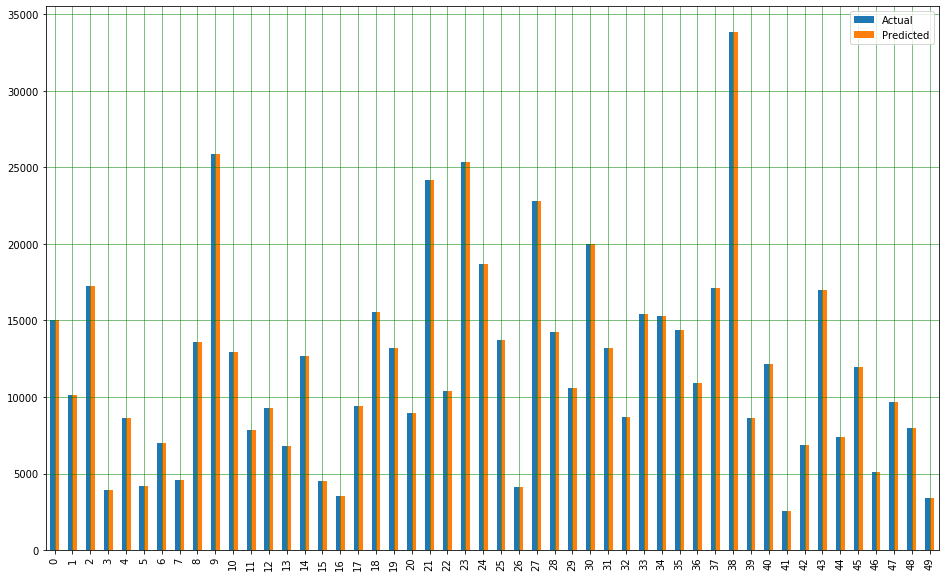

In [14]:
# Test model with unseen data (test data)
y_pred = cross_val_predict(model, test_x, test_y)

df = pd.DataFrame({'Actual': test_y.values.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

After testing the model and plotting the values of prediction and the actual values of the consumption, I see the high performance of this model in making the prediction. Therefore, there is no need to use more complicated machine learning models like deep neural networks.
If the model was not good enough, I would first look at the features seperately to try to figure out the most relevent ones and the next step would be using more sophisticated models like SVMs or ensembles of classifiers or deep neural networks.